In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense


In [4]:
import tensorflow as tf

In [5]:
import matplotlib.pyplot as plt

In [6]:
dat=pd.read_excel(r'C:\Users\Yogen\Documents\Mr. Beast Data Analysis\Attributes Classification.xlsx')

In [7]:
most_recent = pd.read_excel(r'C:\Users\Yogen\Documents\Mr. Beast Data Analysis\Most Recent Videos.xlsx')

In [8]:
most_recent.head()

,0,1,2,3,4
0,2021-01-01,"Youtube Rewind 2020, Thank God It's Over",19200000,0.992,230000
1,2020-12-23,"I Put 1,000,000 Christmas Lights On A House (W...",29800000,0.986,113000
2,2020-12-19,I Opened A Restaurant That Pays You To Eat At It,32900000,0.990,683000
3,2020-12-15,"I Gave People $1,000,000 But ONLY 1 Minute To ...",39000000,0.990,147000
4,2020-11-28,"Steal This $100,000 Diamond, You Keep It",36300000,0.976,81000


In [9]:
dat.head()

,Videos,Big set-piece,Feats of endurance,Understandability,Charity,Wholesome,Other people's happiness,Big MONEY feel,Excitement,Absolutely INSANE,...,Happiness,Sadness,Disgust,Surprise,Tension Release,Intrigue,Thumbnail Catchiness,Thumbnail Intrigue,Title Catchiness,Title Intrigue
0,"I Put 1,000,000 Christmas Lights On A House (W...",0.6,0.00,1.0,0.0,0.40,0.55,0.60,0.10,0.30,...,0.6,0.3,0.0,0.82,0.6,0.70,0.7,0.40,0.6,0.4
1,I Opened A Restaurant That Pays You To Eat At It,0.4,0.00,1.0,0.5,0.85,0.90,0.75,0.40,0.70,...,0.8,0.2,0.0,0.40,0.0,0.20,0.8,0.75,0.6,0.7
2,"I Gave People $1,000,000 But ONLY 1 Minute To ...",0.2,0.00,1.0,0.0,0.80,0.75,0.85,0.30,0.64,...,0.7,0.3,0.2,0.60,0.7,0.60,0.3,0.30,0.7,0.8
3,"Steal This $100,000 Diamond, You Keep It",0.5,0.65,1.0,0.0,0.50,0.60,0.60,0.20,0.30,...,0.7,0.0,0.0,0.40,0.6,0.40,0.7,0.55,0.7,0.7
4,"Press This Button To Win $100,000!",0.0,0.00,1.0,0.0,0.60,0.70,0.80,0.35,0.30,...,0.7,0.0,0.4,0.30,0.6,0.67,0.1,0.10,0.7,0.7


In [10]:
videos_needed=most_recent[1][1:22]

In [11]:
videos_needed.pop(8)

'$300,000 Influencer Trivia Tournament!'

In [12]:
len(videos_needed)

20

In [13]:
indices=videos_needed.index

In [14]:
dat['Quality']=list(most_recent.iloc[indices][3])

In [15]:
#views of videos as Y values
y_train=pd.DataFrame(most_recent.iloc[indices][2])
y_train = pd.DataFrame([float(x) for x in list(y_train[2])])
def divide_by(x):
    return x/100000

y_train = y_train.apply(divide_by, axis=1)

In [16]:
#inputs to neural network
x_train=dat.drop(['Videos'], axis=1)

In [88]:
classifier = Sequential()

classifier.add(Dense(8, kernel_initializer = 'he_uniform', use_bias = True, bias_initializer="zeros", activation='relu',input_dim = 25))

classifier.add(Dense(6, kernel_initializer = 'he_uniform', use_bias = True, bias_initializer="zeros", activation='relu'))

classifier.add(Dense(4, kernel_initializer = 'he_uniform', use_bias = True, bias_initializer="zeros", activation='relu'))

classifier.add(Dense(1, kernel_initializer = 'he_uniform'))

classifier.compile(loss=root_mean_squared_error, optimizer='Adamax')

model_history=classifier.fit(x_train.values, y_train.values,validation_split=0.20, batch_size = 8, epochs = 1000)

Epoch 1/1000
2/2 [==============================] - 1s 210ms/step - loss: 371.5398 - val_loss: nan
Epoch 2/1000
2/2 [==============================] - 0s 56ms/step - loss: 378.2234 - val_loss: nan
Epoch 3/1000
2/2 [==============================] - 0s 48ms/step - loss: 379.1047 - val_loss: nan
Epoch 4/1000
2/2 [==============================] - 0s 53ms/step - loss: 364.4162 - val_loss: nan
Epoch 5/1000
2/2 [==============================] - 0s 53ms/step - loss: 381.6761 - val_loss: nan
Epoch 6/1000
2/2 [==============================] - 0s 59ms/step - loss: 381.6271 - val_loss: nan
Epoch 7/1000
2/2 [==============================] - 0s 57ms/step - loss: 369.9882 - val_loss: nan
Epoch 8/1000
2/2 [==============================] - 0s 57ms/step - loss: 373.0662 - val_loss: nan
Epoch 9/1000
2/2 [==============================] - 0s 53ms/step - loss: 371.8021 - val_loss: nan
Epoch 10/1000
2/2 [==============================] - 0s 57ms/step - loss: 370.1419 - val_loss: nan
Epoch 11/1000
2/2 

Epoch 84/1000
2/2 [==============================] - 0s 46ms/step - loss: 371.0917 - val_loss: nan
Epoch 85/1000
2/2 [==============================] - 0s 48ms/step - loss: 369.3178 - val_loss: nan
Epoch 86/1000
2/2 [==============================] - 0s 46ms/step - loss: 366.0709 - val_loss: nan
Epoch 87/1000
2/2 [==============================] - 0s 49ms/step - loss: 366.2200 - val_loss: nan
Epoch 88/1000
2/2 [==============================] - 0s 45ms/step - loss: 361.8303 - val_loss: nan
Epoch 89/1000
2/2 [==============================] - 0s 47ms/step - loss: 364.4478 - val_loss: nan
Epoch 90/1000
2/2 [==============================] - 0s 46ms/step - loss: 367.7115 - val_loss: nan
Epoch 91/1000
2/2 [==============================] - 0s 47ms/step - loss: 364.2498 - val_loss: nan
Epoch 92/1000
2/2 [==============================] - 0s 49ms/step - loss: 371.1074 - val_loss: nan
Epoch 93/1000
2/2 [==============================] - 0s 46ms/step - loss: 367.2007 - val_loss: nan
Epoch 94/1

2/2 [==============================] - 0s 47ms/step - loss: 345.2314 - val_loss: nan
Epoch 167/1000
2/2 [==============================] - 0s 47ms/step - loss: 346.7350 - val_loss: nan
Epoch 168/1000
2/2 [==============================] - 0s 46ms/step - loss: 345.0410 - val_loss: nan
Epoch 169/1000
2/2 [==============================] - 0s 46ms/step - loss: 337.6522 - val_loss: nan
Epoch 170/1000
2/2 [==============================] - 0s 47ms/step - loss: 338.3633 - val_loss: nan
Epoch 171/1000
2/2 [==============================] - 0s 45ms/step - loss: 336.6604 - val_loss: nan
Epoch 172/1000
2/2 [==============================] - 0s 47ms/step - loss: 344.9690 - val_loss: nan
Epoch 173/1000
2/2 [==============================] - 0s 48ms/step - loss: 332.1541 - val_loss: nan
Epoch 174/1000
2/2 [==============================] - 0s 46ms/step - loss: 349.6765 - val_loss: nan
Epoch 175/1000
2/2 [==============================] - 0s 49ms/step - loss: 345.8764 - val_loss: nan
Epoch 176/1000


2/2 [==============================] - 0s 47ms/step - loss: 293.2245 - val_loss: nan
Epoch 249/1000
2/2 [==============================] - 0s 47ms/step - loss: 292.0391 - val_loss: nan
Epoch 250/1000
2/2 [==============================] - 0s 46ms/step - loss: 297.7349 - val_loss: nan
Epoch 251/1000
2/2 [==============================] - 0s 47ms/step - loss: 300.1500 - val_loss: nan
Epoch 252/1000
2/2 [==============================] - 0s 48ms/step - loss: 288.9527 - val_loss: nan
Epoch 253/1000
2/2 [==============================] - 0s 48ms/step - loss: 296.0411 - val_loss: nan
Epoch 254/1000
2/2 [==============================] - 0s 55ms/step - loss: 288.0065 - val_loss: nan
Epoch 255/1000
2/2 [==============================] - 0s 68ms/step - loss: 284.9487 - val_loss: nan
Epoch 256/1000
2/2 [==============================] - 0s 56ms/step - loss: 288.9506 - val_loss: nan
Epoch 257/1000
2/2 [==============================] - 0s 52ms/step - loss: 297.3524 - val_loss: nan
Epoch 258/1000


2/2 [==============================] - 0s 49ms/step - loss: 204.8535 - val_loss: nan
Epoch 331/1000
2/2 [==============================] - 0s 48ms/step - loss: 204.2235 - val_loss: nan
Epoch 332/1000
2/2 [==============================] - 0s 47ms/step - loss: 205.0110 - val_loss: nan
Epoch 333/1000
2/2 [==============================] - 0s 46ms/step - loss: 203.2777 - val_loss: nan
Epoch 334/1000
2/2 [==============================] - 0s 47ms/step - loss: 206.4268 - val_loss: nan
Epoch 335/1000
2/2 [==============================] - 0s 46ms/step - loss: 201.3317 - val_loss: nan
Epoch 336/1000
2/2 [==============================] - 0s 47ms/step - loss: 184.3130 - val_loss: nan
Epoch 337/1000
2/2 [==============================] - 0s 50ms/step - loss: 190.9245 - val_loss: nan
Epoch 338/1000
2/2 [==============================] - 0s 45ms/step - loss: 184.5970 - val_loss: nan
Epoch 339/1000
2/2 [==============================] - 0s 45ms/step - loss: 194.6287 - val_loss: nan
Epoch 340/1000


Epoch 495/1000
2/2 [==============================] - 0s 47ms/step - loss: 62.7046 - val_loss: nan
Epoch 496/1000
2/2 [==============================] - 0s 46ms/step - loss: 66.6380 - val_loss: nan
Epoch 497/1000
2/2 [==============================] - 0s 48ms/step - loss: 62.1748 - val_loss: nan
Epoch 498/1000
2/2 [==============================] - 0s 47ms/step - loss: 64.9805 - val_loss: nan
Epoch 499/1000
2/2 [==============================] - 0s 46ms/step - loss: 71.6900 - val_loss: nan
Epoch 500/1000
2/2 [==============================] - 0s 48ms/step - loss: 68.4822 - val_loss: nan
Epoch 501/1000
2/2 [==============================] - 0s 47ms/step - loss: 62.3006 - val_loss: nan
Epoch 502/1000
2/2 [==============================] - 0s 45ms/step - loss: 63.4430 - val_loss: nan
Epoch 503/1000
2/2 [==============================] - 0s 47ms/step - loss: 70.6658 - val_loss: nan
Epoch 504/1000
2/2 [==============================] - 0s 47ms/step - loss: 63.9950 - val_loss: nan
Epoch 505/

Epoch 660/1000
2/2 [==============================] - 0s 46ms/step - loss: 60.0688 - val_loss: nan
Epoch 661/1000
2/2 [==============================] - 0s 45ms/step - loss: 56.6054 - val_loss: nan
Epoch 662/1000
2/2 [==============================] - 0s 46ms/step - loss: 66.5504 - val_loss: nan
Epoch 663/1000
2/2 [==============================] - 0s 47ms/step - loss: 65.6386 - val_loss: nan
Epoch 664/1000
2/2 [==============================] - 0s 46ms/step - loss: 66.1600 - val_loss: nan
Epoch 665/1000
2/2 [==============================] - 0s 46ms/step - loss: 59.2552 - val_loss: nan
Epoch 666/1000
2/2 [==============================] - 0s 46ms/step - loss: 62.5761 - val_loss: nan
Epoch 667/1000
2/2 [==============================] - 0s 47ms/step - loss: 59.2908 - val_loss: nan
Epoch 668/1000
2/2 [==============================] - 0s 48ms/step - loss: 65.8583 - val_loss: nan
Epoch 669/1000
2/2 [==============================] - 0s 45ms/step - loss: 64.1126 - val_loss: nan
Epoch 670/

2/2 [==============================] - 0s 46ms/step - loss: 61.4643 - val_loss: nan
Epoch 825/1000
2/2 [==============================] - 0s 48ms/step - loss: 57.0690 - val_loss: nan
Epoch 826/1000
2/2 [==============================] - 0s 45ms/step - loss: 56.7126 - val_loss: nan
Epoch 827/1000
2/2 [==============================] - 0s 48ms/step - loss: 53.9945 - val_loss: nan
Epoch 828/1000
2/2 [==============================] - 0s 46ms/step - loss: 55.4044 - val_loss: nan
Epoch 829/1000
2/2 [==============================] - 0s 45ms/step - loss: 58.6949 - val_loss: nan
Epoch 830/1000
2/2 [==============================] - 0s 46ms/step - loss: 55.8858 - val_loss: nan
Epoch 831/1000
2/2 [==============================] - 0s 47ms/step - loss: 58.7192 - val_loss: nan
Epoch 832/1000
2/2 [==============================] - 0s 46ms/step - loss: 55.7137 - val_loss: nan
Epoch 833/1000
2/2 [==============================] - 0s 46ms/step - loss: 61.2151 - val_loss: nan
Epoch 834/1000
2/2 [=====

Epoch 907/1000
2/2 [==============================] - 0s 47ms/step - loss: 53.4175 - val_loss: nan
Epoch 908/1000
2/2 [==============================] - 0s 46ms/step - loss: 58.5930 - val_loss: nan
Epoch 909/1000
2/2 [==============================] - 0s 49ms/step - loss: 57.8944 - val_loss: nan
Epoch 910/1000
2/2 [==============================] - 0s 48ms/step - loss: 58.3625 - val_loss: nan
Epoch 911/1000
2/2 [==============================] - 0s 47ms/step - loss: 59.1438 - val_loss: nan
Epoch 912/1000
2/2 [==============================] - 0s 48ms/step - loss: 53.7461 - val_loss: nan
Epoch 913/1000
2/2 [==============================] - 0s 49ms/step - loss: 58.6765 - val_loss: nan
Epoch 914/1000
2/2 [==============================] - 0s 48ms/step - loss: 53.5571 - val_loss: nan
Epoch 915/1000
2/2 [==============================] - 0s 47ms/step - loss: 58.9457 - val_loss: nan
Epoch 916/1000
2/2 [==============================] - 0s 48ms/step - loss: 53.4196 - val_loss: nan
Epoch 917/

In [18]:
from keras import backend as K
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [89]:
classifier.save(r'C:\Users\Yogen\Documents\Mr. Beast Data Analysis')

INFO:tensorflow:Assets written to: C:\Users\Yogen\Documents\Mr. Beast Data Analysis\assets


In [19]:
classifier = keras.models.load_model(r'C:\Users\Yogen\Documents\Mr. Beast Data Analysis', custom_objects= {'root_mean_squared_error':root_mean_squared_error})

#### Visualizing Neural Network

In [20]:
from ann_visualizer.visualize import ann_viz;

ann_viz(classifier, title="My first neural network")

#### Getting Attribute Weights

In [27]:
attributes=list(x_train.columns)

#### Increase of 0.1

In [40]:
attributes=list(x_train.columns)

In [41]:
#function to get increase and baseline change into table
def change_in_value_analysis(baseline_value, inc_or_dec):
    inp=[]
    for i in range(25):
        l=[baseline_value]*24
        l.insert(i, baseline_value+inc_or_dec)
        inp.append(l)
    attribute_weights_inp_dict={}
    for i in range(len(attributes)):
        attribute_weights_inp_dict[attributes[i]] = inp[i]
    
    attribute_weights_inp = pd.DataFrame(attribute_weights_inp_dict)
    baseline=[baseline_value]*25
    baseline_row = pd.DataFrame([baseline], columns= attribute_weights_inp.columns)
    attribute_weights_inp = attribute_weights_inp.append(baseline_row, ignore_index= True)
    
    individual_effect[str(inc_or_dec)+" increase on "+ str(baseline_value)] = classifier.predict(attribute_weights_inp.values)
    individual_effect[str(inc_or_dec)+" increase on "+ str(baseline_value)+ " BL"] = individual_effect[str(inc_or_dec)+" increase on "+ str(baseline_value)]/individual_effect.iloc[25][str(inc_or_dec)+" increase on "+ str(baseline_value)]
    

##### Append this to table

In [42]:
change_in_value_analysis(0.6,0.1)

In [44]:
for i in range(3):
    change_in_value_analysis(j, 0.1)
    j=j+0.1

In [45]:
individual_effect #greatest effect because of big money and tension release. decrease due to sadness

,0,0.1 increase,0.1 increase BL,0.1 increase on 0.6,0.1 increase on 0.6 BL,0.1 increase on 0.7,0.1 increase on 0.7 BL,0.1 increase on 0.7999999999999999,0.1 increase on 0.7999999999999999 BL,0.1 increase on 0.8999999999999999,0.1 increase on 0.8999999999999999 BL
0,Big set-piece,355.855408,1.007503,418.270966,1.006376,480.686523,1.005544,543.102112,1.004903,605.517517,1.004396
1,Feats of endurance,353.896057,1.001956,416.311584,1.001662,478.727081,1.001445,541.142700,1.001278,603.558167,1.001146
2,Understandability,356.180115,1.008422,418.595673,1.007157,481.011200,1.006223,543.426758,1.005504,605.842346,1.004935
3,Charity,353.406952,1.000571,415.822510,1.000485,478.238007,1.000422,540.653625,1.000373,603.069153,1.000335
4,Wholesome,354.274933,1.003028,416.690460,1.002573,479.106018,1.002238,541.521667,1.001979,603.937134,1.001774
5,Other people's happiness,354.219635,1.002872,416.635193,1.002440,479.050751,1.002122,541.466309,1.001877,603.881836,1.001683
6,Big MONEY feel,358.137726,1.013965,420.553314,1.011868,482.968842,1.010318,545.384460,1.009126,607.799927,1.008182
7,Excitement,356.115967,1.008241,418.531525,1.007003,480.947052,1.006089,543.362549,1.005385,605.778137,1.004828
8,Absolutely INSANE,356.235382,1.008579,418.650909,1.007290,481.066437,1.006338,543.481995,1.005606,605.897522,1.005026
9,Feeling someone was cool,355.149200,1.005504,417.564728,1.004677,479.980255,1.004066,542.395813,1.003596,604.811279,1.003224


### Sadness Maxima

###### Initialising dataframe

In [103]:
inp=[]
l=[0]*24
l.insert(15, 0.1)
inp.append(l)
    
attribute_weights_inp = pd.DataFrame(inp)
baseline=[0]*25
baseline_row = pd.DataFrame([baseline], columns= attribute_weights_inp.columns)
attribute_weights_inp = attribute_weights_inp.append(baseline_row, ignore_index= True)

sadness_effect = pd.DataFrame(classifier.predict(attribute_weights_inp.values))

In [104]:
attribute_weights_inp

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0,0,0,0,0,0,0,0,0,0,...,0.1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0,0,0


In [105]:
sadness_effect

,0
0,41.036194
1,41.127640


In [173]:
#Sadness maxima
def sadness_dataframe_generator(others, inc_or_dec):
    inp=[]
    j=inc_or_dec
    for i in range(10):
        l=[others]*24
        l.insert(15, others+j)
        inp.append(l)
        j = j + inc_or_dec

    df = pd.DataFrame(inp)
    baseline=[others]*25
    baseline_row = pd.DataFrame([baseline], columns= attribute_weights_inp.columns)
    df = df.append(baseline_row, ignore_index= True)
    return df
def sadness_analysis(others, inc_or_dec):
    df = sadness_dataframe_generator(others, inc_or_dec)

    sadness_effect[str(inc_or_dec)+" increase on "+ str(others)] = classifier.predict(df.values)
    sadness_effect[str(inc_or_dec)+" increase on "+ str(others)+ " BL"] = sadness_effect[str(inc_or_dec)+" increase on "+ str(others)]/sadness_effect.iloc[10][str(inc_or_dec)+" increase on "+ str(others)]
    

In [176]:
sadness_effect = pd.DataFrame(classifier.predict(sadness_dataframe_generator(0, 0.1).values))
sadness_analysis(0,0.1)
sadness_effect = sadness_effect.drop([0], axis=1)

In [189]:
not_sadness = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
for i in range(9):
    sadness_analysis(not_sadness[i],0.1)

In [190]:
sadness_effect

,0.1 increase on 0,0.1 increase on 0 BL,0.1 increase on 0.2,0.1 increase on 0.2 BL,0.1 increase on 0.3,0.1 increase on 0.3 BL,0.1 increase on 0.4,0.1 increase on 0.4 BL,0.1 increase on 0.5,0.1 increase on 0.5 BL,0.1 increase on 0.6,0.1 increase on 0.6 BL,0.1 increase on 0.7,0.1 increase on 0.7 BL,0.1 increase on 0.8,0.1 increase on 0.8 BL,0.1 increase on 0.9,0.1 increase on 0.9 BL,0.1 increase on 1,0.1 increase on 1 BL
0,41.036194,0.997777,165.803909,0.999067,228.219437,0.999322,290.634979,0.999468,353.050537,0.999562,415.466034,0.999627,477.881592,0.999676,540.297180,0.999713,602.712708,0.999743,665.128174,0.999767
1,40.944748,0.995553,165.649109,0.998134,228.064651,0.998644,290.480164,0.998935,352.895721,0.999124,415.311279,0.999255,477.726776,0.999352,540.142395,0.999427,602.557922,0.999487,664.973450,0.999535
2,40.853306,0.993330,165.494308,0.997202,227.909851,0.997966,290.325348,0.998403,352.740875,0.998685,415.156464,0.998883,477.571991,0.999029,539.987549,0.999140,602.403076,0.999230,664.818665,0.999302
3,40.761856,0.991106,165.339508,0.996269,227.755051,0.997289,290.170563,0.997871,352.586121,0.998247,415.001678,0.998510,477.417175,0.998705,539.832764,0.998854,602.248230,0.998973,664.663879,0.999069
4,40.670410,0.988883,165.184708,0.995336,227.600204,0.996611,290.015747,0.997338,352.431274,0.997809,414.846893,0.998138,477.262390,0.998381,539.677979,0.998568,602.093445,0.998716,664.509033,0.998837
5,40.578964,0.986659,165.029892,0.994403,227.445419,0.995933,289.860931,0.996806,352.276459,0.997370,414.692047,0.997765,477.107574,0.998057,539.523132,0.998281,601.938660,0.998459,664.354187,0.998604
6,40.487522,0.984436,164.875076,0.993470,227.290604,0.995255,289.706116,0.996273,352.121674,0.996932,414.537262,0.997393,476.952759,0.997733,539.368347,0.997995,601.783875,0.998203,664.199402,0.998371
7,40.396072,0.982212,164.736984,0.992638,227.135818,0.994577,289.551361,0.995741,351.966888,0.996494,414.382477,0.997020,476.797943,0.997409,539.213501,0.997708,601.629089,0.997946,664.044617,0.998139
8,40.304630,0.979989,164.645554,0.992087,226.981003,0.993899,289.396545,0.995209,351.812042,0.996055,414.227631,0.996648,476.643158,0.997085,539.058777,0.997422,601.474304,0.997689,663.889771,0.997906
9,40.213188,0.977766,164.554092,0.991536,226.826187,0.993221,289.241699,0.994676,351.657288,0.995617,414.072784,0.996275,476.488312,0.996762,538.903931,0.997135,601.319397,0.997432,663.735046,0.997673


ANY value of sadness always decreases the predicted no. of views.

In [191]:
sadness_effect.to_excel(r"C:\Users\Yogen\Documents\Mr. Beast Data Analysis\Sadness Effect.xlsx")

array([[0.9977765 ],
       [0.9955531 ],
       [0.9933297 ],
       [0.99110615],
       [0.98888266],
       [0.9866592 ],
       [0.98443586],
       [0.98221225],
       [0.9799889 ],
       [0.9777655 ],
       [1.        ]], dtype=float32)

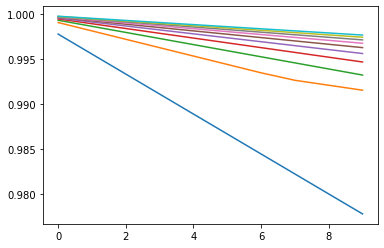

In [238]:
legend_labels=[]
for i in range(0,18,2):
    put = list(sadness_effect.columns)[i]
    legend_labels.append(put)

In [239]:
legend_labels

['0.1 increase on 0',
 '0.1 increase on 0.2',
 '0.1 increase on 0.3',
 '0.1 increase on 0.4',
 '0.1 increase on 0.5',
 '0.1 increase on 0.6',
 '0.1 increase on 0.7',
 '0.1 increase on 0.8',
 '0.1 increase on 0.9']

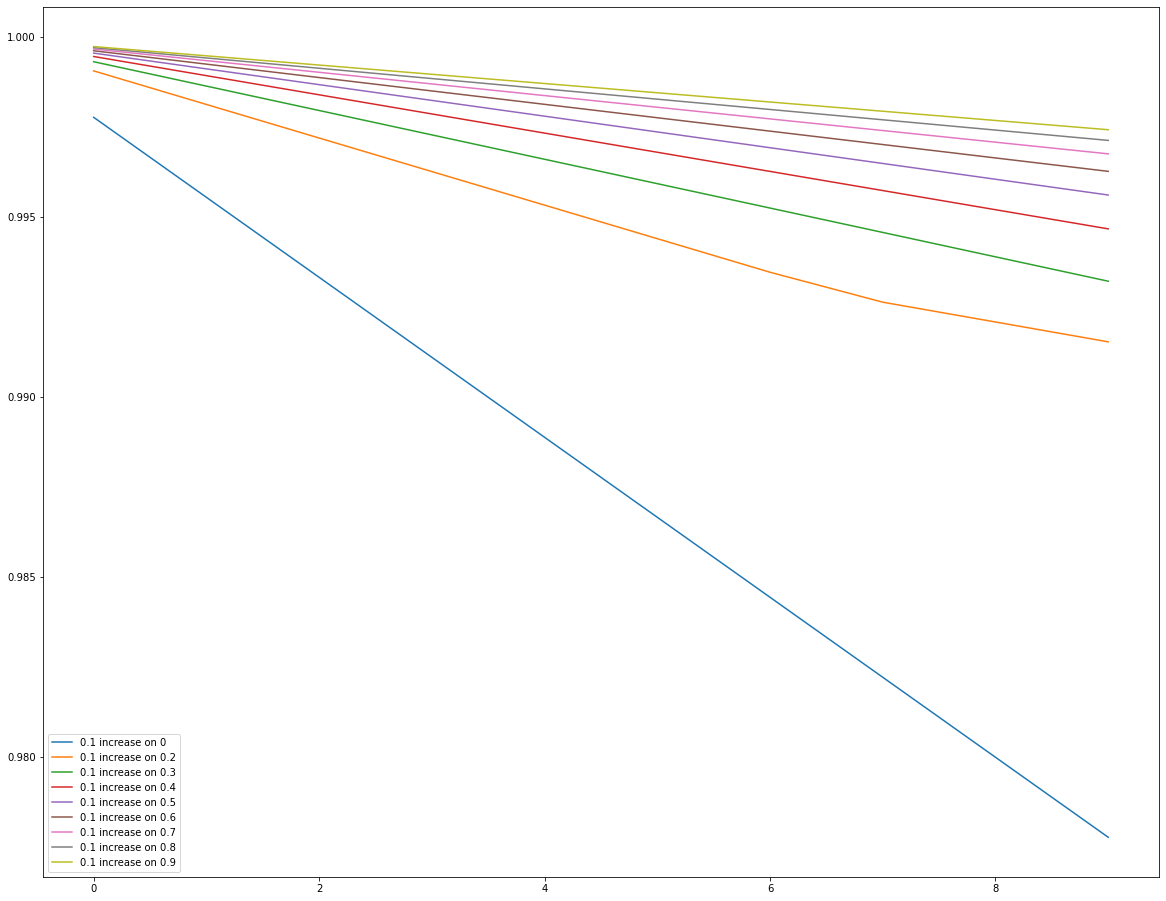

In [242]:
plt.figure(figsize=(20,16))
plt.plot(sadness_effect.iloc[:10,[1]].values)
plt.plot(sadness_effect.iloc[:10,[3]].values)
plt.plot(sadness_effect.iloc[:10,[5]].values)
plt.plot(sadness_effect.iloc[:10,[7]].values)
plt.plot(sadness_effect.iloc[:10,[9]].values)
plt.plot(sadness_effect.iloc[:10,[11]].values)
plt.plot(sadness_effect.iloc[:10,[13]].values)
plt.plot(sadness_effect.iloc[:10,[15]].values)
plt.plot(sadness_effect.iloc[:10,[17]].values)
plt.legend(legend_labels)
plt.savefig(r'C:\Users\Yogen\Documents\Mr. Beast Data Analysis\Sadness BAD.jpg')

## Individual Effect of 'Big MONEY Feel' and 'Tension Release'

In [220]:
percentage_inc_over_point_5 =individual_effect.iloc[:,[2,4,6,8,10]]

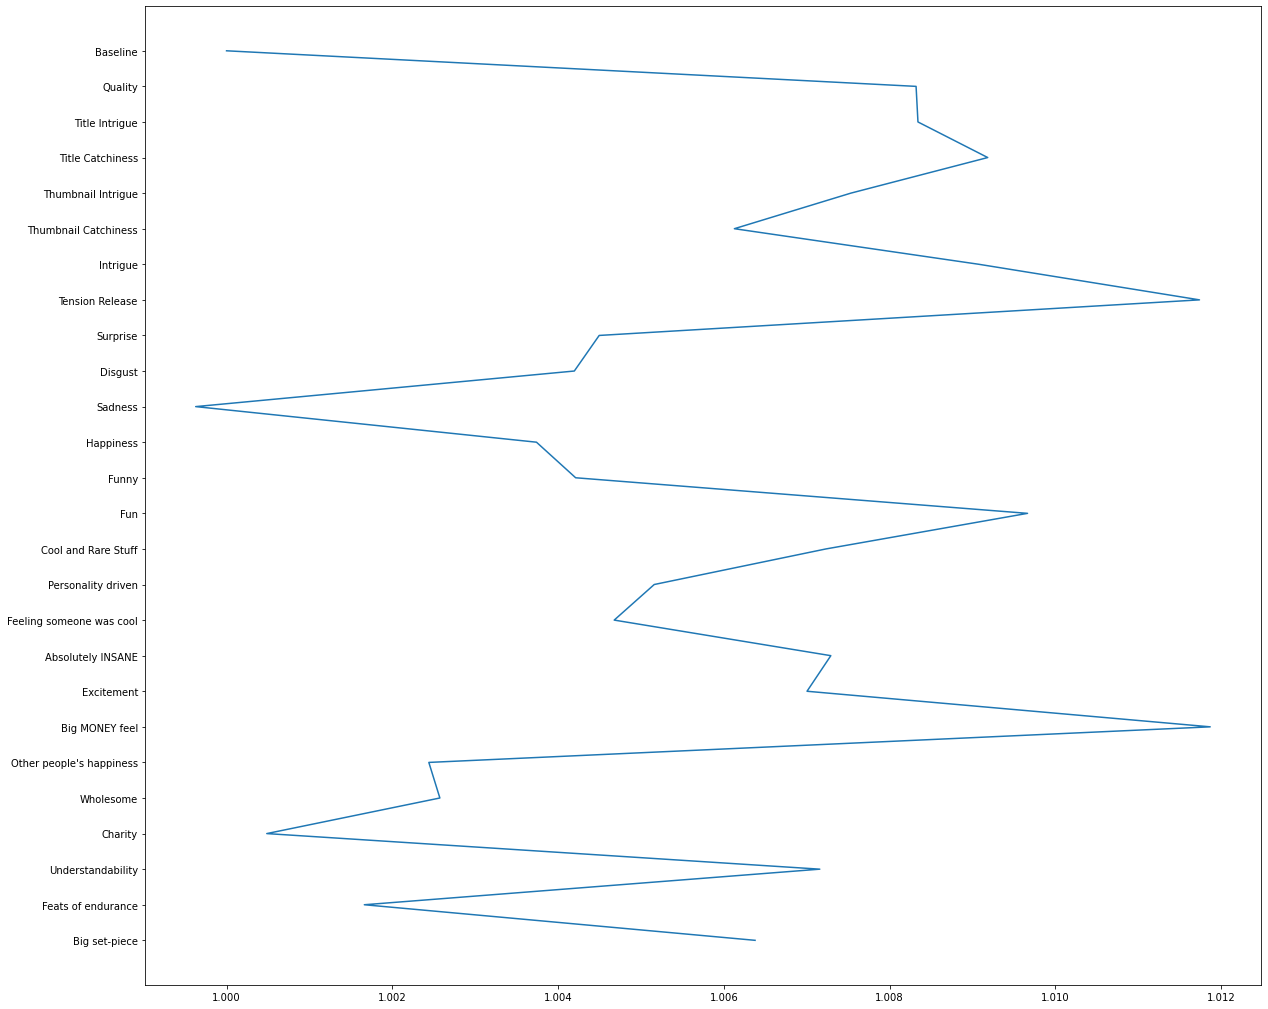

In [244]:
plt.figure(figsize= (20,18))
plt.plot(list(percentage_inc_over_point_5.iloc[:,1]), list(individual_effect.iloc[:,0]))
plt.savefig(r'C:\Users\Yogen\Documents\Mr. Beast Data Analysis\Good Stuff.jpg')